In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/program_dataset/concrete_data.csv")

In [3]:
df

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor

In [5]:
X = df.drop('Strength',axis=1)
y = df.iloc[:,-1]

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, 
                                                    random_state=42)


In [6]:
clf = DecisionTreeRegressor(max_depth=3,random_state=2021)
clf2 = clf.fit(X_train, y_train)

In [11]:
import graphviz 
from sklearn import tree
# =============================================================================
# dot_data = tree.export_graphviz(clf2, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("Housing") 
# =============================================================================
dot_data = tree.export_graphviz(clf2, out_file=None, 
                         feature_names=list(X_train),  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

In [7]:
y_pred = clf2.predict(X_test)

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(mean_squared_error(y_test, y_pred) )
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

132.2276906563686
9.099958222100193
0.5535724066793436


In [8]:
#######################Grid Search CV#############################
depth_range = [3,4,5,6,7,8,9]
minsplit_range = [5,10,20,25,30]
minleaf_range = [5,10,15]

parameters = dict(max_depth=depth_range,
                  min_samples_split=minsplit_range, 
                  min_samples_leaf=minleaf_range)

from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=2021,shuffle=True)
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeRegressor(random_state=2021)
cv = GridSearchCV(clf, param_grid=parameters,
                  cv=kfold,scoring='r2')

cv.fit(X,y)
# Best Parameters
print(cv.best_params_)

print(cv.best_score_)

cv.best_estimator_

{'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.8103675395686103


DecisionTreeRegressor(max_depth=9, min_samples_leaf=5, min_samples_split=5,
                      random_state=2021)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

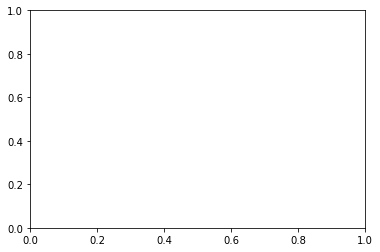

In [10]:
######################################################################
best_model = cv.best_estimator_
import matplotlib.pyplot as plt

best_model.feature_importances_

ind = np.arange(10)
plt.bar(ind,best_model.feature_importances_)
plt.xticks(ind,(X.columns),rotation=45)
plt.title('Feature Importance')
plt.xlabel("Variables")
plt.show()
########################################################################